In [39]:
from pandas import read_csv
import numpy as np

In [40]:
df = read_csv('airline-data.csv',usecols=[1])

In [41]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [42]:
values = df.values.astype('float32')
values

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [43]:
values.shape

(144, 1)

In [44]:
train_size = int(values.shape[0]*0.67)
train_size

96

In [45]:
test_size = values.shape[0]-train_size
train = values[0:train_size]
test = values[train_size:]

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train  = scaler.fit_transform(train)
test = scaler.transform(test)

In [47]:
def create_dataset(data,k):
    dataX , dataY = [],[]
    
    for i in range(data.shape[0]-k):
        x = data[i:i+k,0]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    
    return np.array(dataX),np.array(dataY)

In [48]:
look_back = 12
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)


In [49]:
# RESHAPE Training and Testing data
trainX = np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX = np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [50]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [51]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')
model.fit(trainX,trainY,epochs=10,batch_size=1)

/home/codex/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0192
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0089
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0079
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0057


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


In [52]:
testPredict = model.predict(testX)
# Unscale predicted data 
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
# Unscale predicted data 
trainPredict = scaler.inverse_transform(trainPredict).ravel()



testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()


testPredict.shape,testTrue.shape


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


((36,), (36,))

# Comparing Predicted Results

In [53]:
from matplotlib import pyplot as plt

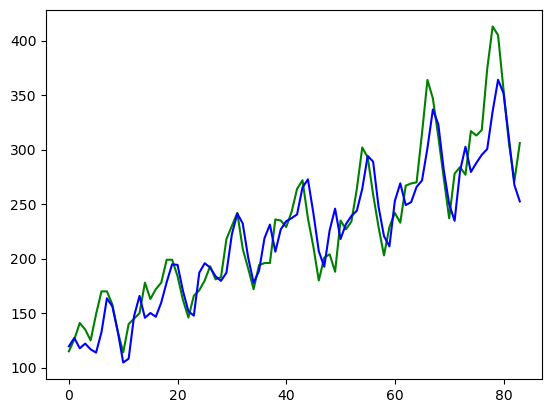

In [54]:
plt.plot(trainTrue,c='g')
plt.plot(trainPredict,c='b')
plt.show()

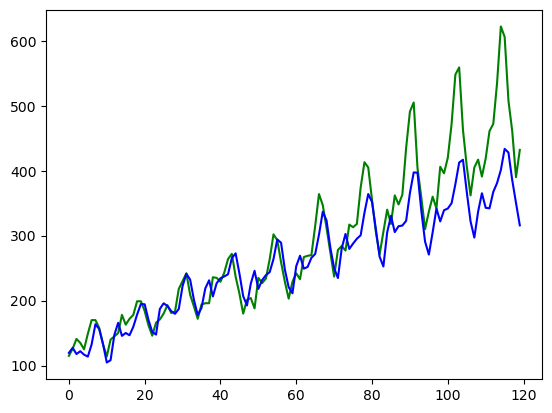

In [55]:
combinedPredicted  = np.concatenate((trainPredict,testPredict))
combinedTrue  = np.concatenate((trainTrue,testTrue))

plt.plot(combinedTrue,c='g')
plt.plot(combinedPredicted,c='b')
plt.show()